In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sbn 
import datetime as dtime

In [3]:
data = pd.read_csv(r"C:\Users\dwigh\Downloads\2013_Green_Taxi_Trip_Data_20241028.csv")
data.pickup_datetime = pd.to_datetime(data.pickup_datetime)
data.dropoff_datetime = pd.to_datetime(data.dropoff_datetime)
data['time_diff'] = (data.dropoff_datetime - data.pickup_datetime).dt.total_seconds().div(60)
data.head()


,vendor_id,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,rate_code,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,...,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type,Pickup_longitude,Pickup_latitude,Dropoff_longitude,time_diff
0,2,2013-09-23 10:52:00,2013-09-23 10:52:00,N,1,0.0,1,0.0,1.8,0.0,...,0.25,0.0,NaN,2.05,1,NaN,0.000000,0.00000,0.0,0.000000
1,1,2013-11-09 00:55:29,2013-11-09 00:55:29,N,1,0.0,1,0.0,0.0,0.0,...,0.00,0.0,NaN,0.00,2,NaN,-73.929573,40.75436,0.0,0.000000
2,2,2013-09-17 21:45:09,2013-09-17 21:52:20,N,4,0.0,1,0.0,8.5,0.0,...,0.00,0.0,NaN,9.00,2,NaN,0.000000,0.00000,0.0,7.183333
3,2,2013-10-02 23:17:00,2013-10-02 23:22:54,N,1,0.0,1,0.0,2.8,0.0,...,0.00,0.0,NaN,3.30,2,1.0,0.000000,0.00000,0.0,5.900000
4,2,2013-10-02 23:17:00,2013-10-02 23:22:54,N,1,0.0,1,0.0,2.8,0.0,...,0.00,0.0,NaN,3.30,2,1.0,0.000000,0.00000,0.0,5.900000


In [4]:
data.drop(columns=['Ehail_fee'], inplace=True)

In [10]:
data['day_of_week'] = data['pickup_datetime'].dt.day_name()
data['month'] = data.pickup_datetime.dt.month_name()
data['hour'] = data.pickup_datetime.dt.hour

In [12]:
data.sort_values(by='pickup_datetime', inplace=True)

In [38]:
mon_dow_hr = data.groupby(['vendor_id','month','day_of_week','hour'], as_index=False)[['Total_amount']].sum()
mon_dow = data.groupby(['vendor_id','month','day_of_week'], as_index=False)[['Total_amount']].sum()
dow = data.groupby('day_of_week', as_index=False)[['Total_amount']].sum()

C:\Users\dwigh\AppData\Local\Temp\ipykernel_19292\1297956297.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.barplot(data=dow, x='day_of_week', y='Total_amount', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='rocket')


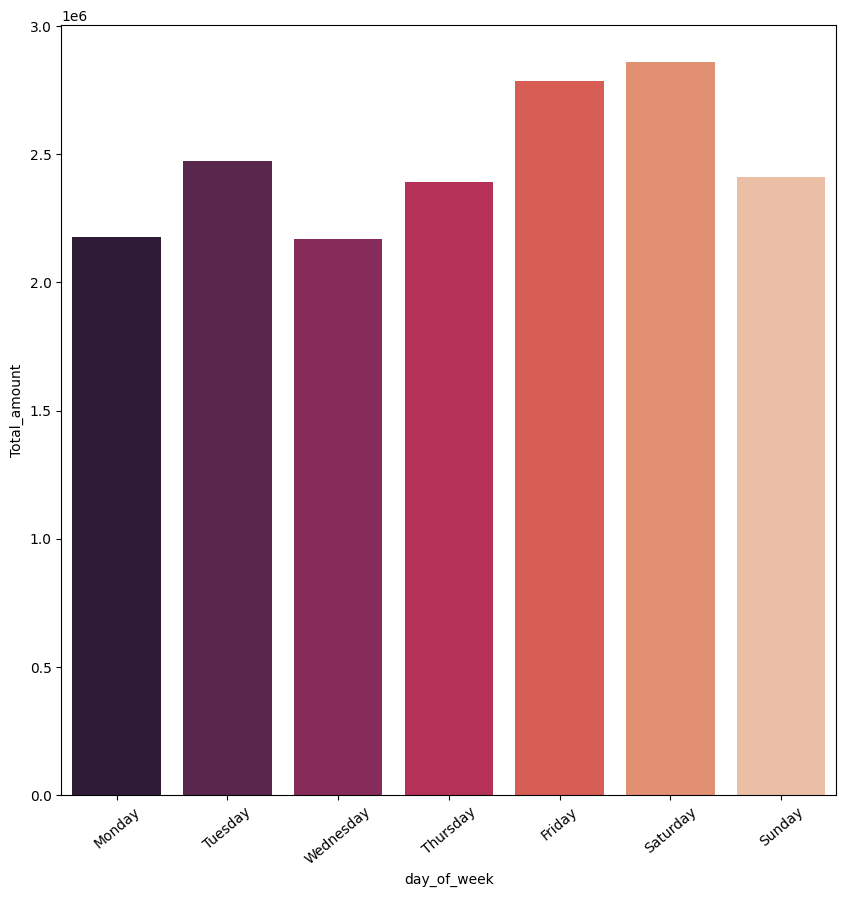

In [56]:
fig= plt.figure(figsize=(10,10))
sbn.barplot(data=dow, x='day_of_week', y='Total_amount', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='rocket')
plt.xticks(rotation=40)
plt.show()

<Figure size 1000x1000 with 0 Axes>

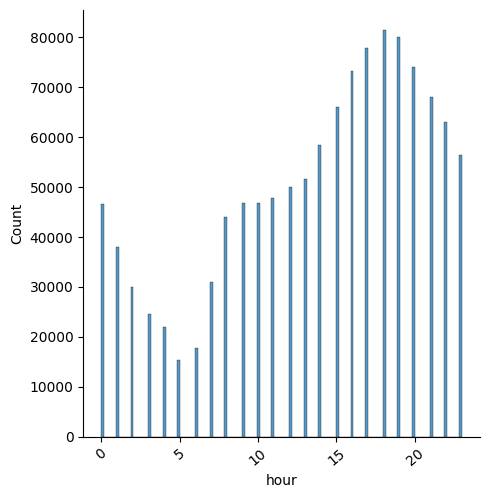

In [57]:
fig= plt.figure(figsize=(10,10))
sbn.displot(data=data,x=data.hour, kind='hist')
plt.xticks(rotation=40)
plt.show()

In [58]:
mon_dow.loc[(2,'August')].plot(title='Total USD per Day',kind='bar')

KeyError: 'August'

Text(0.5, 1.0, 'Total USD by Month & Hour of Day')

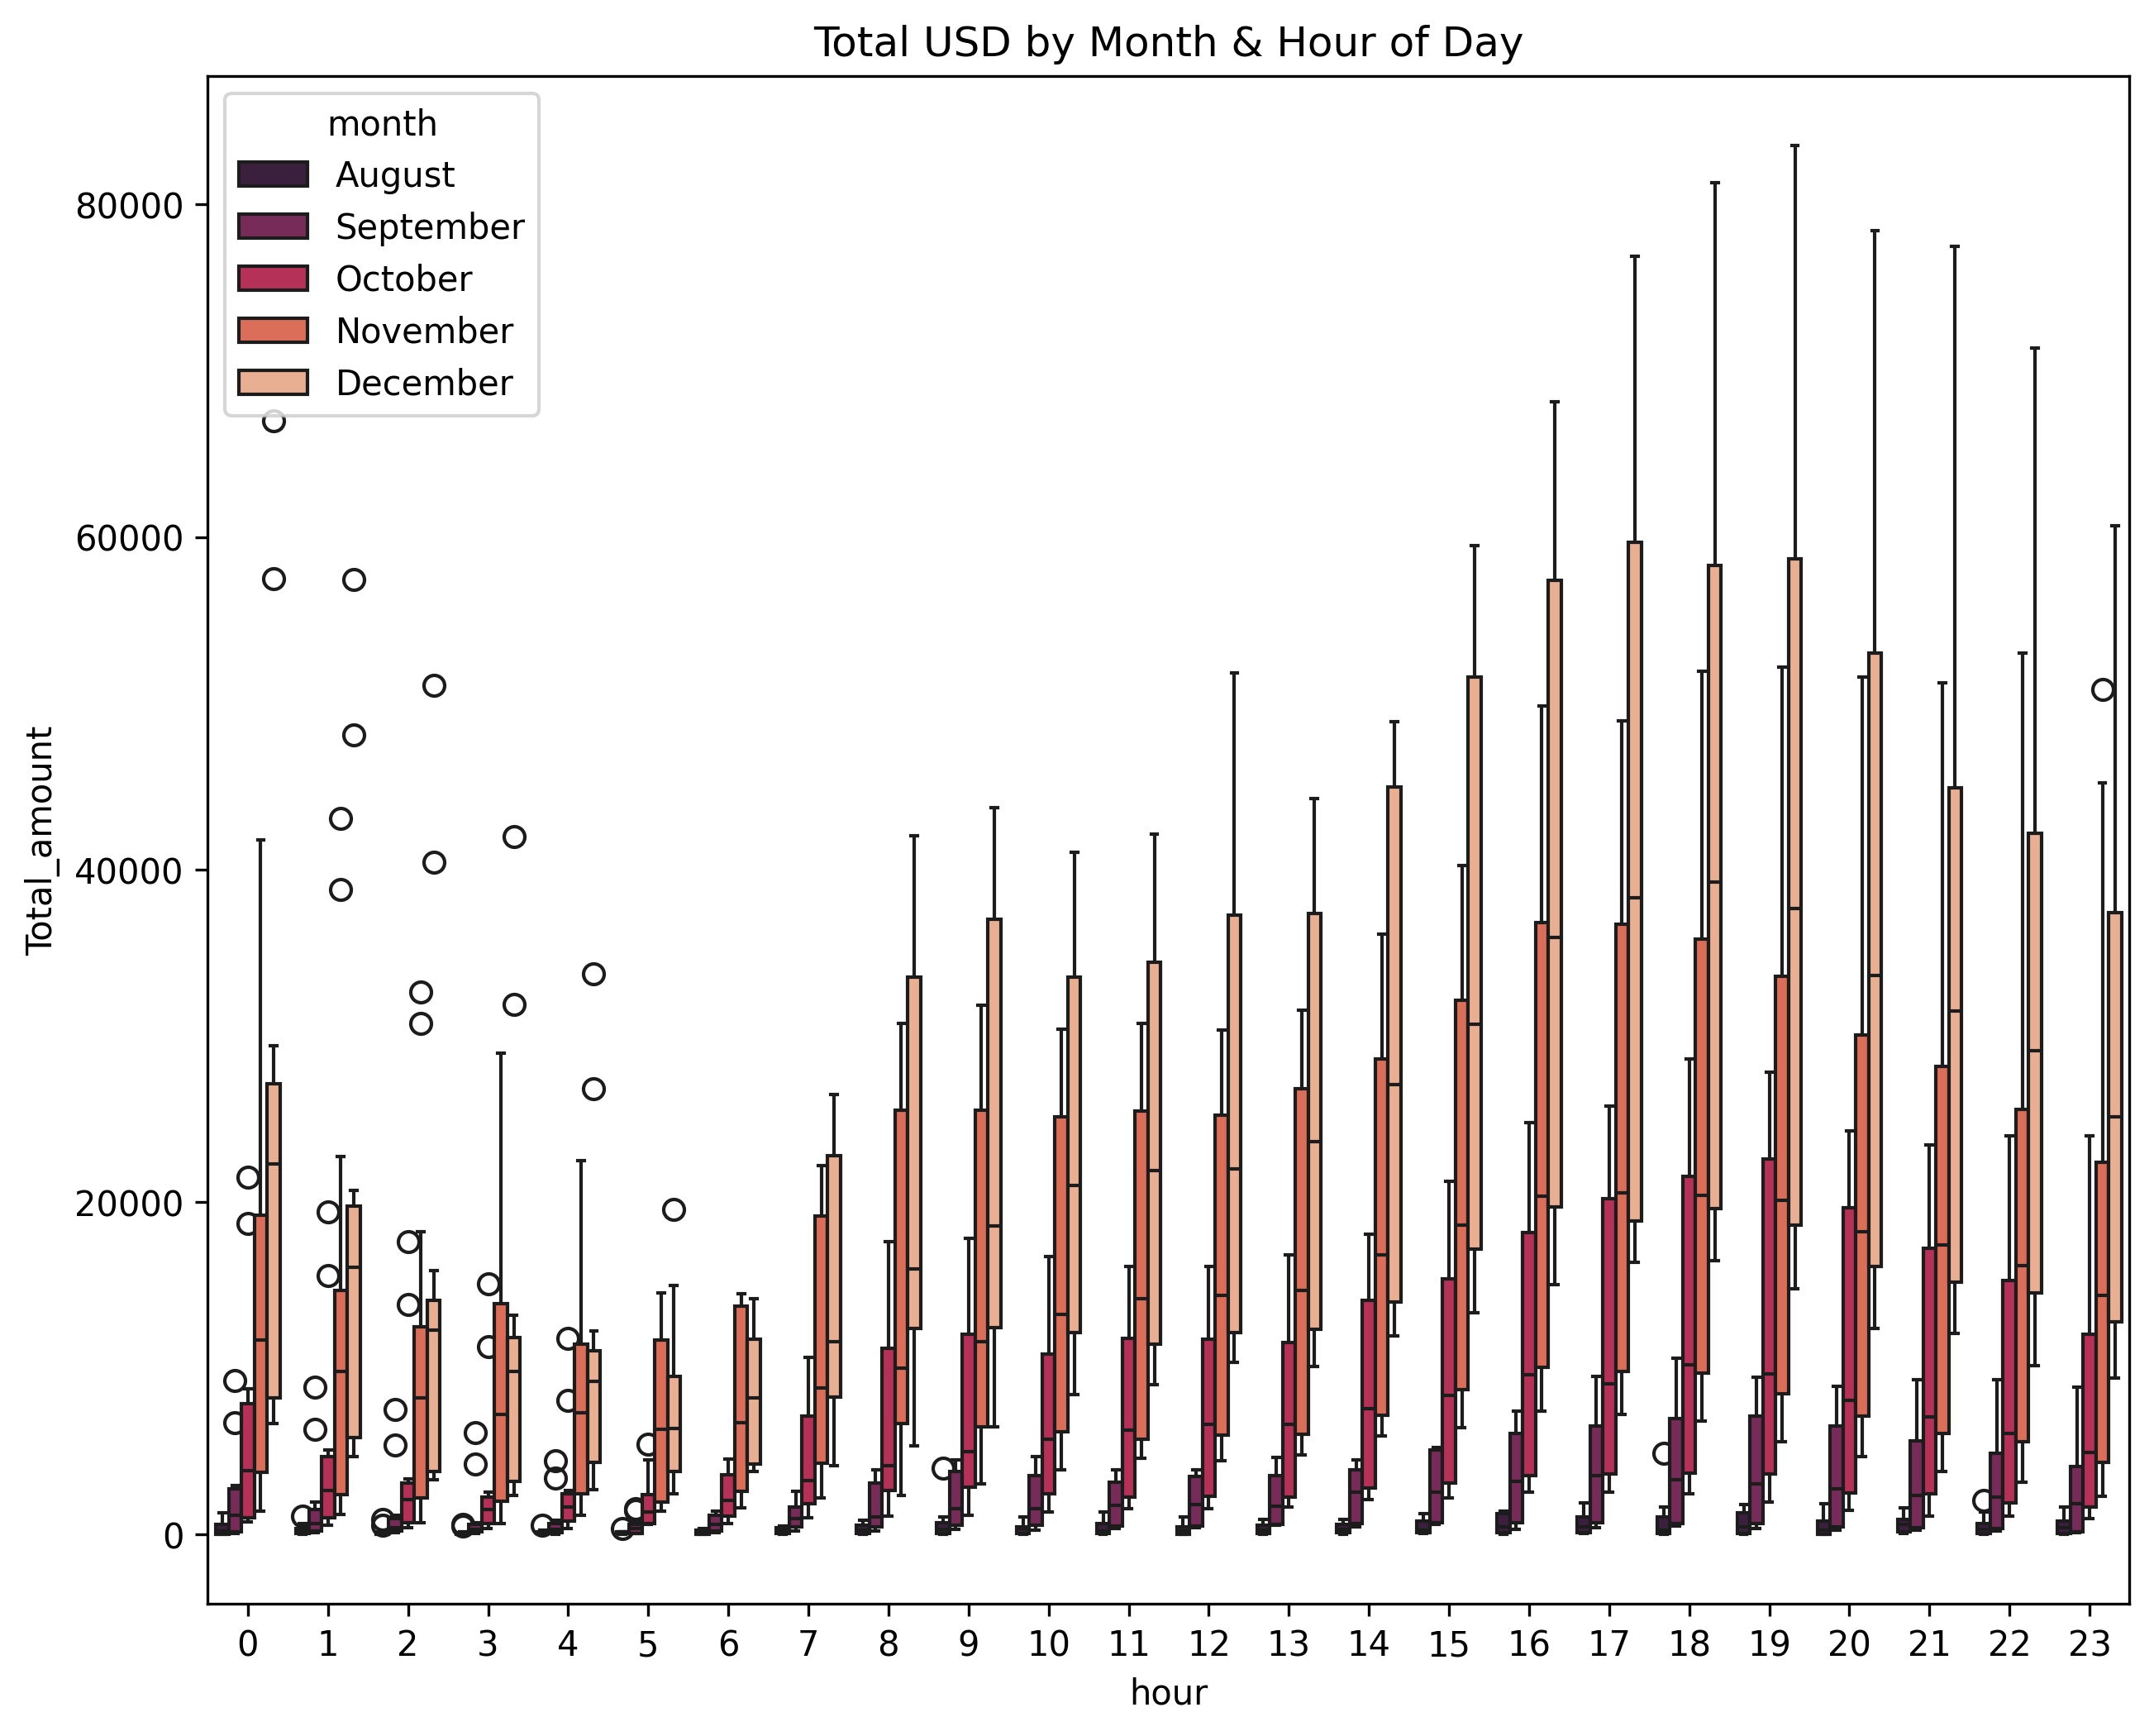

In [62]:
fig, ax = plt.subplots(figsize=(10,8), dpi=300)
# order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sbn.boxplot(data=mon_dow_hr, x='hour', y='Total_amount',hue='month', hue_order=['August','September','October','November','December'], palette='rocket')
ax.set_title('Total USD by Month & Hour of Day')

Text(0.5, 1.0, 'Total USD by Day & Month')

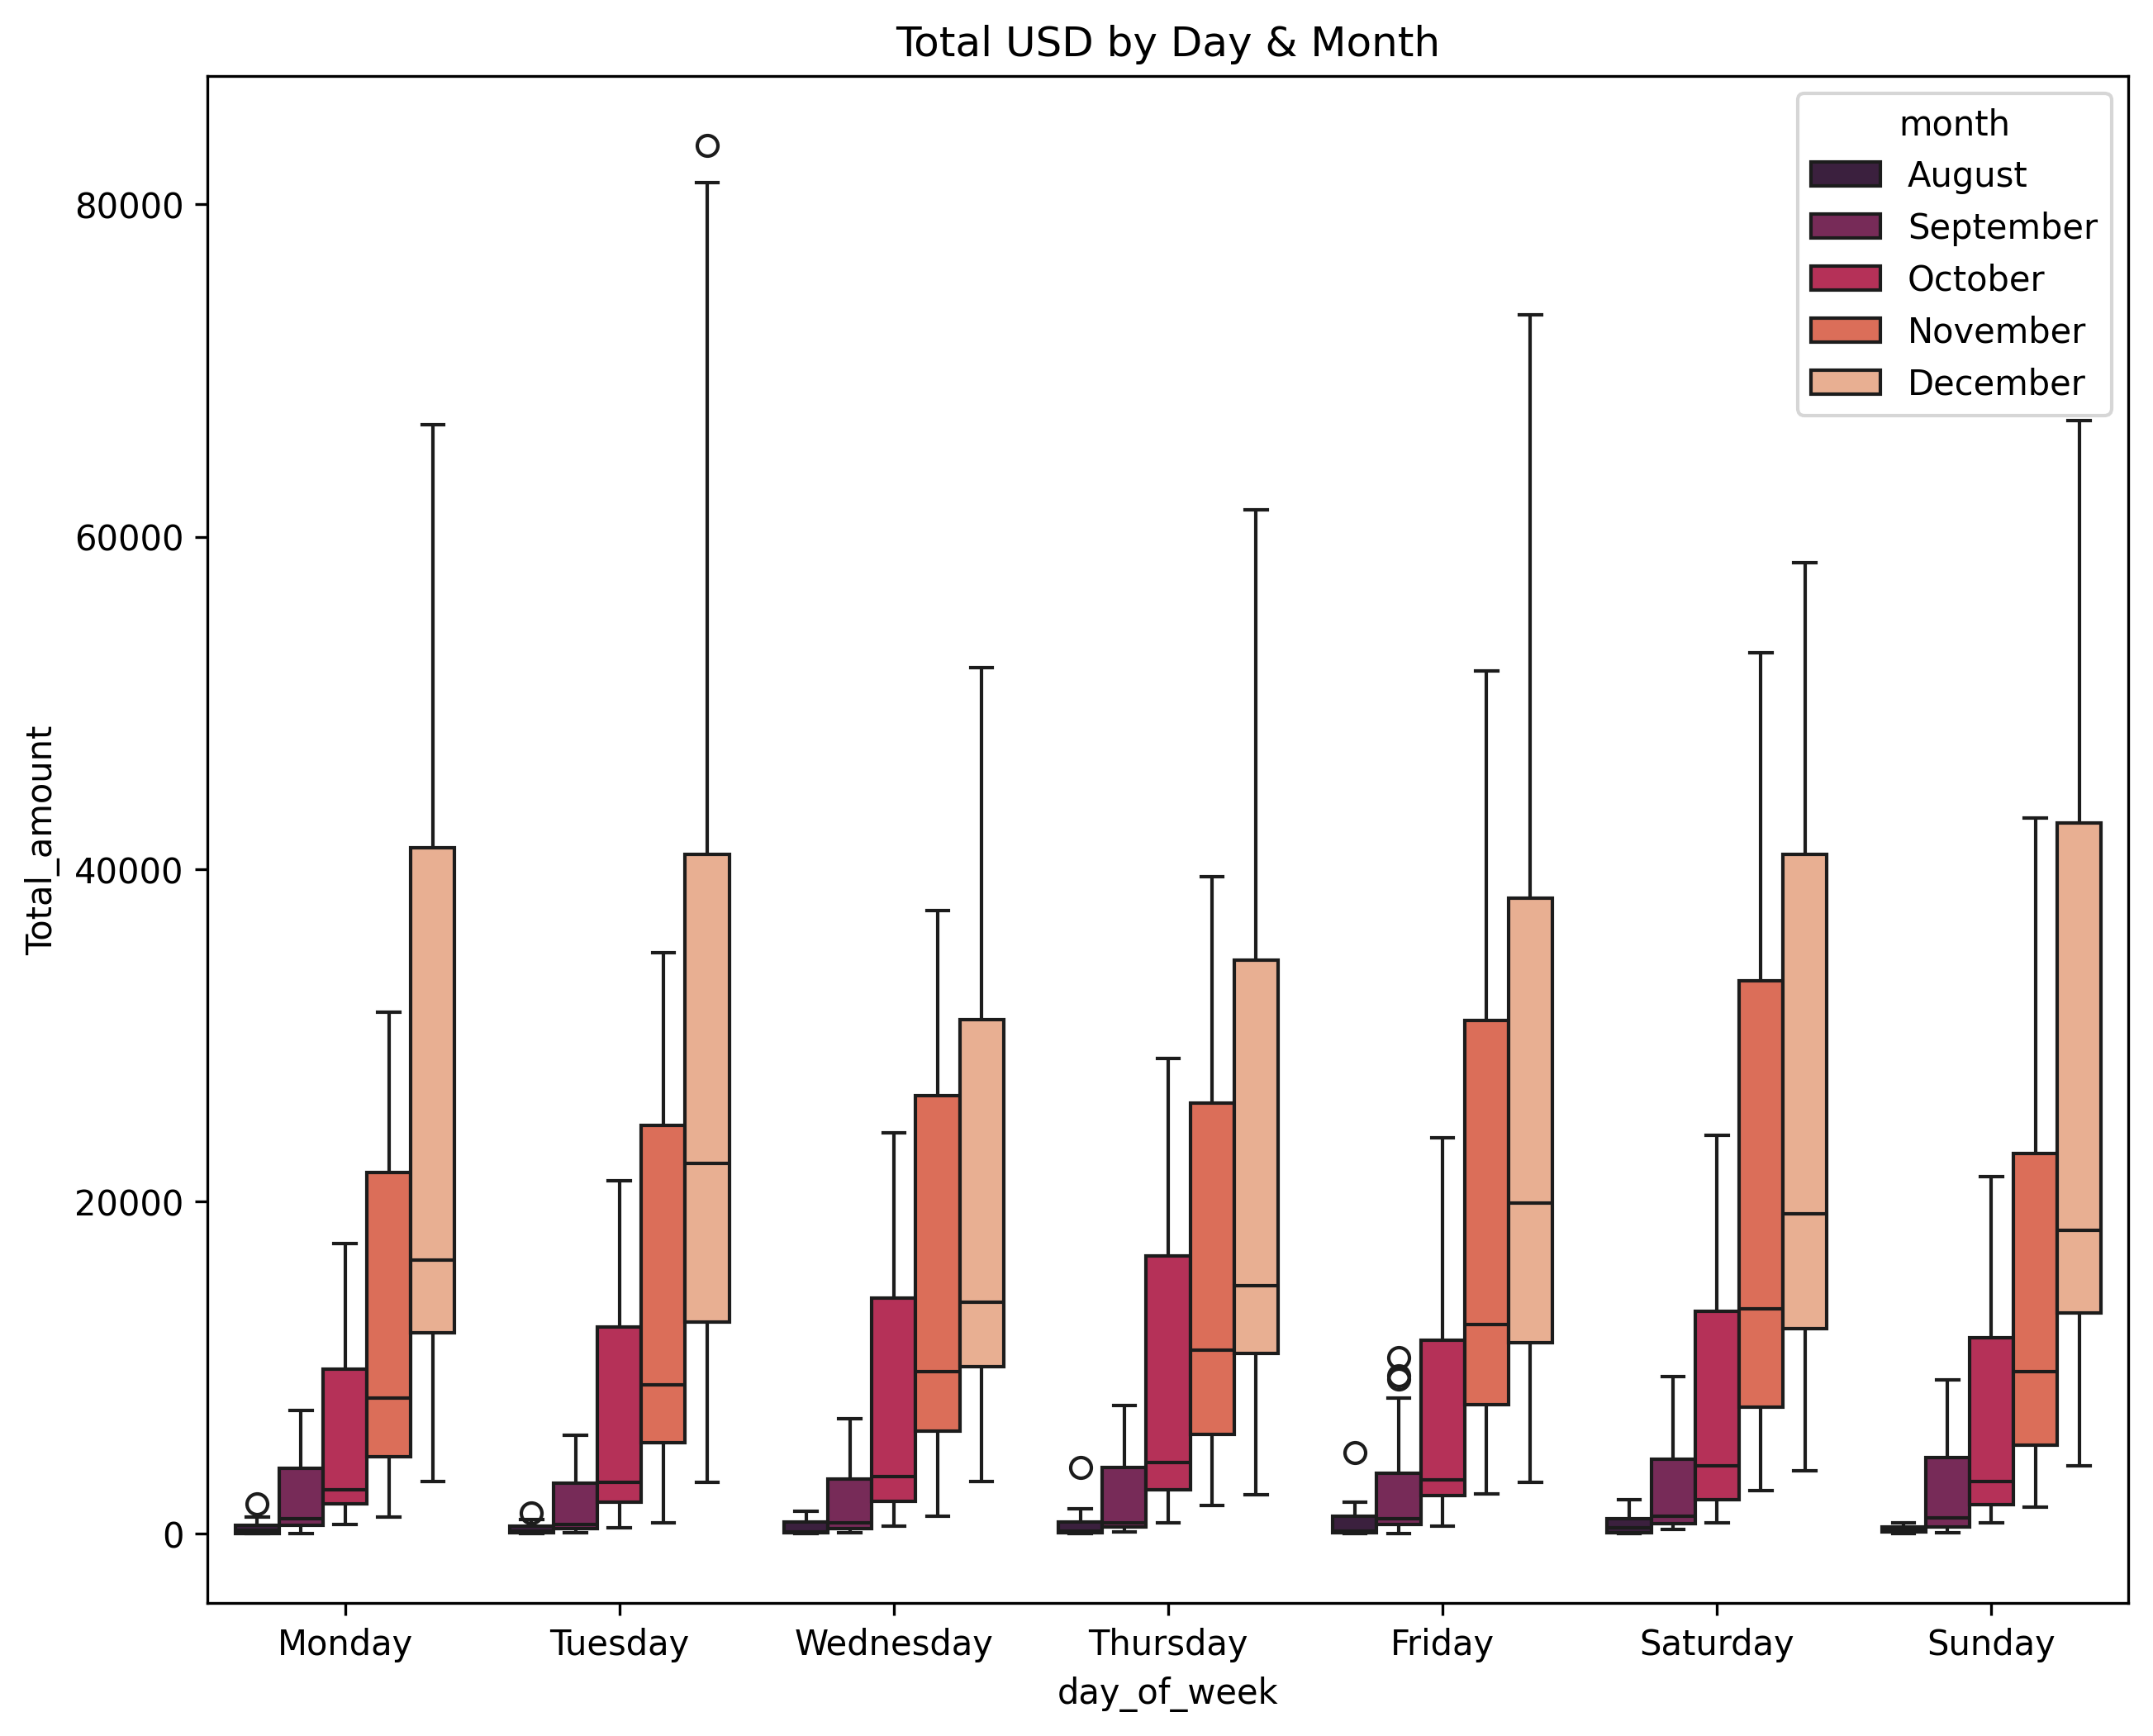

In [64]:
fig, ax = plt.subplots(figsize=(10,8),dpi=300)
sbn.boxplot(data=mon_dow_hr, x='day_of_week', y='Total_amount',hue='month',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],hue_order=['August','September','October','November','December'], palette='rocket')
ax.set_title('Total USD by Day & Month')

<Axes: title={'center': 'Total USD per Hour'}, xlabel='hour'>

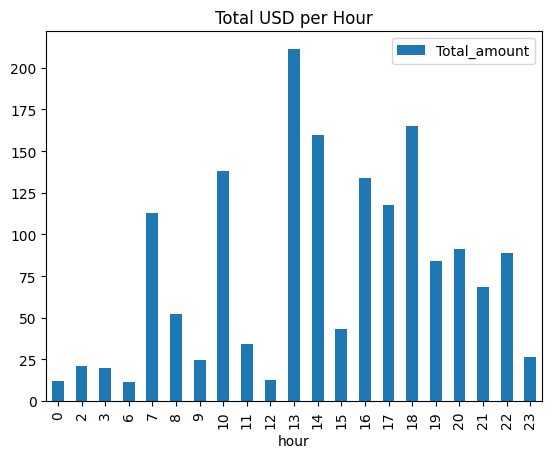

In [50]:
mon_dow_hr.loc[(1,'August', 'Friday')].plot(title='Total USD per Hour',kind='bar')

In [25]:
portions['January']

KeyError: 'January'

In [ ]:
fig= plt.figure(figsize=(10,10))
sbn.displot(data=data,x=data.hour, , kind='hist')
plt.xticks(rotation=40)
plt.show()